# Regression

This assignment is based on the chapter Single Layer Networks: Regression from [Bishop book](bishopbook.com).

---
In this exercise, you will implement a traditional Machine Learning Regression pipeline from scratch.

## Problem
We want to predict a function, given by a mixture of Gaussians. The data is sampled using a lognormal noise distribution given by

$$\frac{1}{x\sigma\sqrt{2\pi}} \exp\left( -\frac{(\ln x - \mu)^2}{2\sigma^2} \right)$$

The `generate_data` function takes an argument, `n_samples`, and returns those many datapoints. On a real dataset, you won't know the nature of the function, hence you are not allowed to use any of the following variables/functions in Parts 1 and 2 of your code -- `means, stds, weights, get_mixture_density`.

The problem statement is to describe the unknown function, using the simplest model, which can still capture the complexity of the function. For now, you can just eye-ball your solutions to know whether you have acheived satisfactory performance.


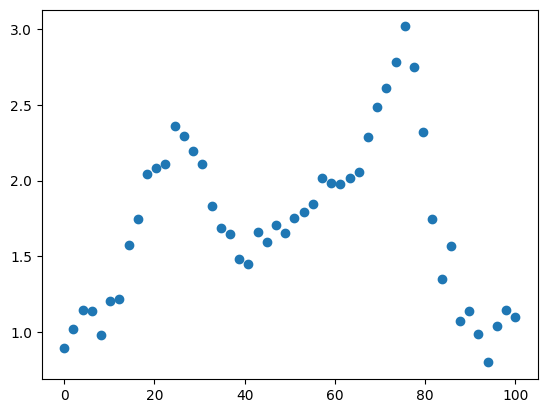

In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Parameters for 3 Gaussians
means = [25, 58, 75]
stds = [8, 12, 5]
weights = [0.25, 0.3, 0.2]

def generate_data(n_samples):
    x_samples = np.linspace(0, 100, n_samples)

    def get_mixture_density(x_vals):
        return 100 * sum(w * (1 / (s * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x_vals - m) / s) ** 2) 
                   for m, s, w in zip(means, stds, weights))

    y_true = get_mixture_density(x_samples)

    # 3. Add lognormal noise
    noise = np.random.lognormal(mean=0, sigma=0.1, size=n_samples)

    y_samples = y_true + noise
    
    # Return as a 2D array (n_samples, 2)
    return np.column_stack((x_samples, y_samples))

# Example usage
data = generate_data(50)
plt.scatter(data[:, 0], data[:,1])


---
## Part 1 | Setup

### Q1
Using the fact that the noise follows a lognormal distribution, derive an expression for the MLE, and consequently, choose an appropriate loss function to minimize. 

### Q2
Now, choose an appropriate set of basis functions. This is called feature engineering (a concept that has lost favor with the advent of deep neural networks, which are considered **universal function approximators**). For most problems, the best choice is $1, x, x^2, ..., x^n$, where $n$ is a hyperparameter, that signifies model complexity. 

### Q3
Using decision theory, compute $\mathbb{E}[t|\boldsymbol{x}]$, the predicted y. To do so, use calculus of variations to compute $\frac{\delta \mathbb{E}[L]}{\delta f(\mathbf{x})}$ and equate it to 0. You can assume $L$ coressponds to L2 loss. 

---

## Part 2 | Training

Create a class `SLR`, that takes as arguments --
* Learning rate
* Regularization coefficient
* Initial weights and biases
It has the following methods --
* `forward(self, x)`: Uses the basis functions followed by conditional mean of the noise distribution to compute estiamte of y. Note that for gaussian noise, this is equal to the mean of distribution, but not in this case. 
* `loss(self, t, y)`: Given the target value t, and estimated value y, it computes the loss between them. Don't forget to use the regularizer (assume $E_w(\mathbf{w}) = \mathbf{w}^T\mathbf{w}$). 
* `step(self)`: Performs one iteration of Stochastic Gradient Descent. 

Then, create another class `Trainer` that takes as argument --
* num_epochs - Number of iterations of SGD
It has the following method --
* `fit(self, model, train_data)`: `model` is an instance of `SLR` class. It calls relevant methods of model, to train the model for `num_epochs`. The train data can be generated by calling `generate_data` function.
* `predict(self, model, x)`: Called after fitting the model. This function simply evaluates the model to return the estimated y for input x.
  
Note that `train_data` is a matrix with `n_samples` rows and 2 columns (x, t) while x is a 1D array.


In [145]:
# TODO

---

## Part 3 | Bias Variance Tradeoff

Now, that we have all components ready, we will train the regression model, and analyse its performance. 

### Q1
As yet, we have no way of optimizing `num_epochs`, `learning_rate` and initial weights and biases. I leave this as an open problem for you to experiment with. If you have trained models before, you might know that we using train-val loss graphs to find it. But this is covered in more detail in later chapters, so if you haven't done it before, just lookup on internet for an initial guess.  

### Q2
Try to recreate the graphs in **Figure 4.7**. You can use `x` in `Trainer.predict` as `np.linspace(0, 100, 1000)`, and plot that against x. Do this for 20 training datasets, each with `n_samples=50`. The average of the fits is simply the average of outputs of their `predict` functions. In this part, you can use the true function code to plot the green line in **Figure 4.7**. Try this for multiple values of regularization coefficient.

### Q3
To find the optimal regularization coefficient, plot the graph shown in **Figure 4.8**. The value of $\lambda$ at which $(\text{bias})^2 + \text{variance}$ is minimum, is the optimal choice. 

In [146]:
# TODO